# 1. Import Required Libraries

In [ ]:
# Data Scraping
import swifter
import snscrape.modules.twitter as sntwitter

# Natural Language Processing
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud
from textblob import TextBlob

# Deep Learning
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras_preprocessing.sequence import pad_sequences
from scikeras.wrappers import KerasClassifier
from mlxtend.plotting import plot_confusion_matrix

# Evaluation
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 2. Data Scraping

In [ ]:
query = "Kebijakan Pemerintah Indonesia since:2022-04-01 until:2022-10-26"
tweets = []
limit = 2000

%time
try:
    print("Start crawling")
    for tweet in sntwitter.TwitterSearchScraper(query=query).get_items():
        if len(tweets) == limit:
            break
        else:
            tweets.append([tweet.date, tweet.id, tweet.username, tweet.content, tweet.url])
            df = pd.DataFrame(tweets, columns =['datetime','id', 'username', 'content', 'url'])
            
except Exception as e:
    print(e)
    
print("Finished")

CPU times: user 0 ns, sys: 22 µs, total: 22 µs
Wall time: 34.3 µs
Start crawling
Finished


In [ ]:
df

,datetime,id,username,content,url
0,2022-10-25 23:40:33+00:00,1585053733276483584,raquelcorreaa,"Mari dukung, Kebijakan Pemerintah demi kemajuan Indonesia https://t.co/CCSJ3cUIx6 #JokowiHebat Iphone 14 Polrestabes Medan",https://twitter.com/raquelcorreaa/status/1585053733276483584
1,2022-10-25 23:11:02+00:00,1585046303494766594,uli_chiallagan,Kita dukung semua kebijakan pemerintah demi kemakmuran Indonesia https://t.co/pUvbOOfw1F #PolrestabesMedan,https://twitter.com/uli_chiallagan/status/1585046303494766594
2,2022-10-25 19:10:58+00:00,1584985892263198721,PGhevira,Dukung Kebijakan pemerintah demi memajukan negara Indonesia https://t.co/dSUfkMNwPB #PolrestabesMedan,https://twitter.com/PGhevira/status/1584985892263198721
3,2022-10-25 16:52:16+00:00,1584950985407234048,manusia_abuabu,"@oh_s00 @cursedOnLif3 @kerrdrogba @TxtdariHI Yg aku benci tu koruptor,Polisi yg ngak bener, pemangku kebijakan yg tidak berpihak pd rakyat (dpr/pemerintah).\nKlo indonesia sebagai bangsa mah aku cinta bgt.\nBisa bedain kn?",https://twitter.com/manusia_abuabu/status/1584950985407234048
4,2022-10-25 15:15:04+00:00,1584926525484584960,gie_nakayah8,@juli_nanas @Junioryossy1 @yusuf_dumdum Papua mahal itu di daerah pegunungan. Sejak dlu klo di SPBU harga sama seluruh Indonesia.\n\nSubsidi BBM itu kebijakan pemerintah. Dapatnya emang dr hutang. Tapi dirasakan lngsung SM rakyat. Untuk kesejahteraan rakyat. \n\nTanpa BBM semua bs mandek.\nTanpa LRT msh bisa kmna2 😝,https://twitter.com/gie_nakayah8/status/1584926525484584960
...,...,...,...,...,...
1995,2022-09-10 08:24:04+00:00,1568515638959943681,Susan21390135,Pemerintah sudah melakukan kalkulasi yang benar dan matang demi kelangsungan ekonomi Indonesia. Oleh karena itu kebijakan Penyesuaian harga BBM sudah tepat\n#BantuanBBMUntukRakyat\n#BLTBBMTepatSasaran\n#SubsidiTepatSasaran https://t.co/V0zkORapTt,https://twitter.com/Susan21390135/status/1568515638959943681
1996,2022-09-10 07:59:25+00:00,1568509435018092544,firman__nurhuda,"Wow , Hacker Bjorka semakin ganas dibanding cebong yang ganas membela Kebijakan Pemerintah , apalagi ganasnya Kadrun yang membela Risik dan mahar.\n\nHmm , Gimana nih Situs perlindungan Data Indonesia..? \n\nHack Surat Jkw Next ,My.Pertamina\n\nCc: @JengkolMayo @ABJ_aseli @bjorka https://t.co/oY446nDjsE",https://twitter.com/firman__nurhuda/status/1568509435018092544
1997,2022-09-10 07:58:07+00:00,1568509106654441474,SAHRULARSY28,Kebijakan Pemerintah Menaikkan harga BBM tentu Sangat zalim. Zalim dengan seluruh Rakyat Indonesia. !!! BLT² yang tidak menyeluruh juga bersifat sementara dan dampak nya untuk banyak orang sangatlah keterlaluan !!!!\n\n#BBM_NaikJokowiTurun \n#BBMNaik_RakyatMenjerit,https://twitter.com/SAHRULARSY28/status/1568509106654441474
1998,2022-09-10 06:27:19+00:00,1568486258460196864,mchlmanufandu,"Kebijakan pemerintah pusat di bawah kepemimpinan Presiden Jokowi, melalui berbagai program sejak tahun 2014 hingga sekarang, tidak pernah berhenti mengembangkan tanah Papua dalam rangka meningkatkan kesejahteraan masyarakat Papua dalam kerangka Negara Kesatuan Republik Indonesia. https://t.co/ILQlLHqFJi",https://twitter.com/mchlmanufandu/status/1568486258460196864


# 3. Data Pre-Processing

In [ ]:
df.drop(['url','id'],axis=1)

,datetime,username,content
0,2022-10-25 23:40:33+00:00,raquelcorreaa,"Mari dukung, Kebijakan Pemerintah demi kemajuan Indonesia https://t.co/CCSJ3cUIx6 #JokowiHebat Iphone 14 Polrestabes Medan"
1,2022-10-25 23:11:02+00:00,uli_chiallagan,Kita dukung semua kebijakan pemerintah demi kemakmuran Indonesia https://t.co/pUvbOOfw1F #PolrestabesMedan
2,2022-10-25 19:10:58+00:00,PGhevira,Dukung Kebijakan pemerintah demi memajukan negara Indonesia https://t.co/dSUfkMNwPB #PolrestabesMedan
3,2022-10-25 16:52:16+00:00,manusia_abuabu,"@oh_s00 @cursedOnLif3 @kerrdrogba @TxtdariHI Yg aku benci tu koruptor,Polisi yg ngak bener, pemangku kebijakan yg tidak berpihak pd rakyat (dpr/pemerintah).\nKlo indonesia sebagai bangsa mah aku cinta bgt.\nBisa bedain kn?"
4,2022-10-25 15:15:04+00:00,gie_nakayah8,@juli_nanas @Junioryossy1 @yusuf_dumdum Papua mahal itu di daerah pegunungan. Sejak dlu klo di SPBU harga sama seluruh Indonesia.\n\nSubsidi BBM itu kebijakan pemerintah. Dapatnya emang dr hutang. Tapi dirasakan lngsung SM rakyat. Untuk kesejahteraan rakyat. \n\nTanpa BBM semua bs mandek.\nTanpa LRT msh bisa kmna2 😝
...,...,...,...
1995,2022-09-10 08:24:04+00:00,Susan21390135,Pemerintah sudah melakukan kalkulasi yang benar dan matang demi kelangsungan ekonomi Indonesia. Oleh karena itu kebijakan Penyesuaian harga BBM sudah tepat\n#BantuanBBMUntukRakyat\n#BLTBBMTepatSasaran\n#SubsidiTepatSasaran https://t.co/V0zkORapTt
1996,2022-09-10 07:59:25+00:00,firman__nurhuda,"Wow , Hacker Bjorka semakin ganas dibanding cebong yang ganas membela Kebijakan Pemerintah , apalagi ganasnya Kadrun yang membela Risik dan mahar.\n\nHmm , Gimana nih Situs perlindungan Data Indonesia..? \n\nHack Surat Jkw Next ,My.Pertamina\n\nCc: @JengkolMayo @ABJ_aseli @bjorka https://t.co/oY446nDjsE"
1997,2022-09-10 07:58:07+00:00,SAHRULARSY28,Kebijakan Pemerintah Menaikkan harga BBM tentu Sangat zalim. Zalim dengan seluruh Rakyat Indonesia. !!! BLT² yang tidak menyeluruh juga bersifat sementara dan dampak nya untuk banyak orang sangatlah keterlaluan !!!!\n\n#BBM_NaikJokowiTurun \n#BBMNaik_RakyatMenjerit
1998,2022-09-10 06:27:19+00:00,mchlmanufandu,"Kebijakan pemerintah pusat di bawah kepemimpinan Presiden Jokowi, melalui berbagai program sejak tahun 2014 hingga sekarang, tidak pernah berhenti mengembangkan tanah Papua dalam rangka meningkatkan kesejahteraan masyarakat Papua dalam kerangka Negara Kesatuan Republik Indonesia. https://t.co/ILQlLHqFJi"


In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
df['text_clean'] = df['content'].swifter.apply(cleaningText)
df['text_clean'] = df['text_clean'].swifter.apply(casefoldingText)
df.drop(['content'], axis = 1, inplace = True)

df['text_preprocessed'] = df['text_clean'].swifter.apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].swifter.apply(filteringText)
df['text_clean']=df['text_preprocessed'].swifter.apply(toSentence)
df.drop_duplicates(subset = 'text_clean', inplace = True)

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
def analisis_sentimen(text):
    try:
        analysis = TextBlob(text)
        result = analysis.translate(from_lang='id', to='en')
        if result.sentiment.polarity > 0:
            return 'Positif'
        elif result.sentiment.polarity == 0:
            return 'Netral'
        else:
            return 'Negatif'
        except:
            pass

In [ ]:
df.to_numpy()

array([[Timestamp('2022-10-25 23:40:33+0000', tz='UTC'),
        1585053733276483584, 'raquelcorreaa', ...,
        'mari dukung kebijakan pemerintah kemajuan indonesia iphone polrestabes medan',
        list(['mari', 'dukung', 'kebijakan', 'pemerintah', 'kemajuan', 'indonesia', 'iphone', 'polrestabes', 'medan']),
        'Netral'],
       [Timestamp('2022-10-25 23:11:02+0000', tz='UTC'),
        1585046303494766594, 'uli_chiallagan', ...,
        'dukung kebijakan pemerintah kemakmuran indonesia',
        list(['dukung', 'kebijakan', 'pemerintah', 'kemakmuran', 'indonesia']),
        'Netral'],
       [Timestamp('2022-10-25 19:10:58+0000', tz='UTC'),
        1584985892263198721, 'PGhevira', ...,
        'dukung kebijakan pemerintah memajukan negara indonesia',
        list(['dukung', 'kebijakan', 'pemerintah', 'memajukan', 'negara', 'indonesia']),
        'Netral'],
       ...,
       [Timestamp('2022-09-10 07:58:07+0000', tz='UTC'),
        1568509106654441474, 'SAHRULARSY28', ...,
 

In [ ]:
df['sentiment'] = df['text_clean'].swifter.apply(analisis_sentimen)

Pandas Apply:   0%|          | 0/1082 [00:00<?, ?it/s]

In [ ]:
df.to_csv('cleaned',index=False)

In [ ]:
df

,datetime,id,username,url,text_clean,text_preprocessed,sentiment
0,2022-10-25 23:40:33+00:00,1585053733276483584,raquelcorreaa,https://twitter.com/raquelcorreaa/status/1585053733276483584,mari dukung kebijakan pemerintah kemajuan indonesia iphone polrestabes medan,"[mari, dukung, kebijakan, pemerintah, kemajuan, indonesia, iphone, polrestabes, medan]",Netral
1,2022-10-25 23:11:02+00:00,1585046303494766594,uli_chiallagan,https://twitter.com/uli_chiallagan/status/1585046303494766594,dukung kebijakan pemerintah kemakmuran indonesia,"[dukung, kebijakan, pemerintah, kemakmuran, indonesia]",Netral
2,2022-10-25 19:10:58+00:00,1584985892263198721,PGhevira,https://twitter.com/PGhevira/status/1584985892263198721,dukung kebijakan pemerintah memajukan negara indonesia,"[dukung, kebijakan, pemerintah, memajukan, negara, indonesia]",Netral
3,2022-10-25 16:52:16+00:00,1584950985407234048,manusia_abuabu,https://twitter.com/manusia_abuabu/status/1584950985407234048,s yg benci tu koruptorpolisi yg ngak bener pemangku kebijakan yg berpihak pd rakyat dprpemerintah klo indonesia bangsa mah cinta bgt bedain kn,"[s, yg, benci, tu, koruptorpolisi, yg, ngak, bener, pemangku, kebijakan, yg, berpihak, pd, rakyat, dprpemerintah, klo, indonesia, bangsa, mah, cinta, bgt, bedain, kn]",Negatif
4,2022-10-25 15:15:04+00:00,1584926525484584960,gie_nakayah8,https://twitter.com/gie_nakayah8/status/1584926525484584960,nanas dumdum papua mahal daerah pegunungan dlu klo spbu harga indonesia subsidi bbm kebijakan pemerintah dapatnya emang dr hutang dirasakan lngsung sm rakyat kesejahteraan rakyat bbm bs mandek lmsh kmna 😝,"[nanas, dumdum, papua, mahal, daerah, pegunungan, dlu, klo, spbu, harga, indonesia, subsidi, bbm, kebijakan, pemerintah, dapatnya, emang, dr, hutang, dirasakan, lngsung, sm, rakyat, kesejahteraan, rakyat, bbm, bs, mandek, lmsh, kmna, 😝]",Negatif
...,...,...,...,...,...,...,...
1995,2022-09-10 08:24:04+00:00,1568515638959943681,Susan21390135,https://twitter.com/Susan21390135/status/1568515638959943681,pemerintah kalkulasi matang kelangsungan ekonomi indonesia kebijakan penyesuaian harga bbm,"[pemerintah, kalkulasi, matang, kelangsungan, ekonomi, indonesia, kebijakan, penyesuaian, harga, bbm]",Positif
1996,2022-09-10 07:59:25+00:00,1568509435018092544,firman__nurhuda,https://twitter.com/firman__nurhuda/status/1568509435018092544,wow hacker bjorka ganas dibanding cebong ganas membela kebijakan pemerintah ganasnya kadrun membela risik mahar hmm gimana nih situs perlindungan data indonesia hack surat jkw next mypertamina cc aseli,"[wow, hacker, bjorka, ganas, dibanding, cebong, ganas, membela, kebijakan, pemerintah, ganasnya, kadrun, membela, risik, mahar, hmm, gimana, nih, situs, perlindungan, data, indonesia, hack, surat, jkw, next, mypertamina, cc, aseli]",Positif
1997,2022-09-10 07:58:07+00:00,1568509106654441474,SAHRULARSY28,https://twitter.com/SAHRULARSY28/status/1568509106654441474,kebijakan pemerintah menaikkan harga bbm zalim zalim rakyat indonesia blt² bersifat dampak nya orang naikjokowiturun rakyatmenjerit,"[kebijakan, pemerintah, menaikkan, harga, bbm, zalim, zalim, rakyat, indonesia, blt², bersifat, dampak, nya, orang, naikjokowiturun, rakyatmenjerit]",Netral
1998,2022-09-10 06:27:19+00:00,1568486258460196864,mchlmanufandu,https://twitter.com/mchlmanufandu/status/1568486258460196864,kebijakan pemerintah pusat kepemimpinan presiden jokowi program berhenti mengembangkan tanah papua rangka meningkatkan kesejahteraan masyarakat papua kerangka negara kesatuan republik indonesia,"[kebijakan, pemerintah, pusat, kepemimpinan, presiden, jokowi, program, berhenti, mengembangkan, tanah, papua, rangka, meningkatkan, kesejahteraan, masyarakat, papua, kerangka, negara, kesatuan, republik, indonesia]",Netral


In [ ]:
df.groupby('sentiment').count()

,datetime,id,username,url,text_clean,text_preprocessed
sentiment,,,,,,
Negatif,41,41,41,41,41,41
Netral,266,266,266,266,266,266
Positif,121,121,121,121,121,121


In [ ]:
X = df['text_preprocessed'].apply(toSentence)
df['text_clean'] = X

# Tokenize text with specific maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=10000, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

(1082, 36)

In [ ]:
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=10000,
    output_mode='int',
    output_sequence_length=50)

vectorize_layer.adapt(df.text_clean)

In [ ]:
polarity_encode = {'Negatif' : 0, 'Netral' : 1, 'Positif' : 2}
y = df['sentiment'].map(polarity_encode).values

# Split the data (with composition data train 80%, data test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(865, 36) (865,)
(217, 36) (217,)


# 4. Modeling

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(10000, 32)(inputs)

x = layers.Bidirectional(layers.LSTM(32, dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(32, dropout=0.2))(x)

x = layers.Dense(16, activation="softmax")(x)
outputs = layers.Dense(1, activation="softmax")(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 64)         16640     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17  

In [ ]:
model.compile(optimizer=tf.optimizers.RMSprop(1e-3), loss="binary_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor="val_loss", patience=4, verbose=1,restore_best_weights=True)

In [ ]:
hist = model.fit(X_train, y_train, batch_size=256, epochs=20,
                 validation_split=0.2,
                 callbacks=[es])

Epoch 1/20
3/3 [==============================] - 12s 1s/step - loss: 0.7020 - accuracy: 0.4884 - val_loss: 0.6686 - val_accuracy: 0.4509
Epoch 2/20
3/3 [==============================] - 1s 197ms/step - loss: 0.6370 - accuracy: 0.4884 - val_loss: 0.4557 - val_accuracy: 0.4509
Epoch 3/20
3/3 [==============================] - 1s 193ms/step - loss: 0.4262 - accuracy: 0.4884 - val_loss: 0.2850 - val_accuracy: 0.4509
Epoch 4/20
3/3 [==============================] - 1s 199ms/step - loss: 0.3211 - accuracy: 0.4884 - val_loss: 0.2249 - val_accuracy: 0.4509
Epoch 5/20
3/3 [==============================] - 1s 192ms/step - loss: 0.2795 - accuracy: 0.4884 - val_loss: 0.1985 - val_accuracy: 0.4509
Epoch 6/20
3/3 [==============================] - 1s 198ms/step - loss: 0.2613 - accuracy: 0.4884 - val_loss: 0.1850 - val_accuracy: 0.4509
Epoch 7/20
3/3 [==============================] - 1s 188ms/step - loss: 0.2511 - accuracy: 0.4884 - val_loss: 0.1756 - val_accuracy: 0.4509
Epoch 8/20
3/3 [======

In [ ]:
a=(y_train == 0).sum()
b=(y_train==1).sum()
c=(y_train==2).sum()

print('Jumlah Sentimen Negatif: 'a)
print('Jumlah Sentimen Netral: ',b)
print('Jumlah Sentimen Negatif: ',c)

338 1115 1101


In [ ]:
def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.05, optimizers = Adam, learning_rate = 0.01):
    model = Sequential()
    model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
    model.add(LSTM(units = hidden_unit, activation = 'softmax'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(learning_rate = learning_rate), metrics = ['accuracy'])
    print(model.summary())
    return model

In [ ]:
history = create_model().fit(X_train,y_train,validation_split=0.6, epochs = 40, batch_size=256, verbose=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 40, 16)            80000     
                                                                 
 lstm_10 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 3)                 51        
                                                                 
Total params: 82,163
Trainable params: 82,163
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
4/4 [==============================] - 2s 147ms/step - loss: 1.0917 - accuracy: 0.4074 - val_loss: 1.0728 - val_accuracy: 0.4468
Epoch 2/40
4/4 [====================

# 5. Evaluation

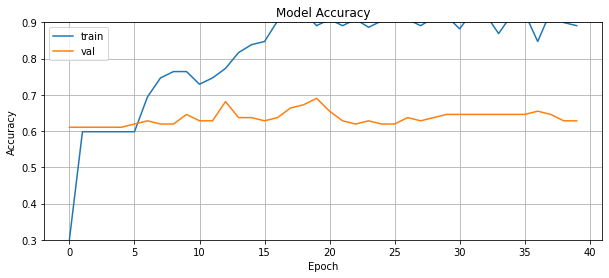

In [ ]:
plt.subplots(figsize = (10, 4))
plt.plot(history.history['accuracy'],label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim([0.3,0.9])
plt.grid()
plt.show()

In [ ]:
print('Model accuracy: ',accuracy_score(y_test,y_pred))
print('Model precision: ',precision_score(y_test,y_pred, average='weighted'))
print('Model recall: ', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score: ', f1_score(y_test,y_pred ,average='m'))

Model accuracy:  0.615146831530139
Model precision:  0.615146831530139
Model recall:  0.615146831530139
F1 Score:  0.615146831530139
